In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from sklearn import metrics

In [3]:
d = {0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankleboot'}

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

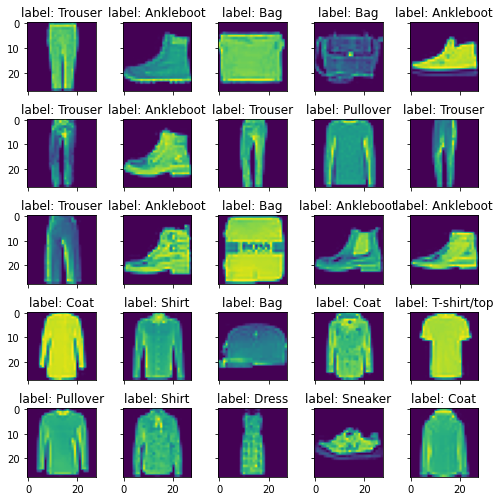

In [5]:
fig, axes = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(7,7))
plt.tight_layout()
for i, ax in enumerate(axes.flatten()):
    j = np.random.randint(0, len(x_train))
    ax.imshow(x_train[j])
    ax.set_title(f'label: {d[y_train[j]]}')
    
plt.show()

In [6]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

In [9]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(4, 4),
                 input_shape=(28, 28, 1),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
with tf.device("/device:GPU:0"):
    model.fit(x_train,
              y_cat_train,
              epochs=15,
              validation_data=(x_test, y_cat_test),
              callbacks=[early_stop])

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3985 - accuracy: 0.8576 - val_loss: 0.3167 - val_accuracy: 0.8860
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2776 - accuracy: 0.8986 - val_loss: 0.3267 - val_accuracy: 0.8814
Epoch 3/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2313 - accuracy: 0.9146 - val_loss: 0.2980 - val_accuracy: 0.8917
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2012 - accuracy: 0.9245 - val_loss: 0.2689 - val_accuracy: 0.9022
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1720 - accuracy: 0.9348 - val_loss: 0.2683 - val_accuracy: 0.9048
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1497 - accuracy: 0.9441 - val_loss: 0.2691 - val_accuracy: 0.9086
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1292 - accuracy: 0.9514 - val_loss: 0.2687 - val_accuracy:

In [11]:
model_perf = pd.DataFrame(model.history.history)
model_perf

,loss,accuracy,val_loss,val_accuracy
0,0.398514,0.857633,0.316658,0.8860
1,0.277555,0.898650,0.326736,0.8814
2,0.231320,0.914633,0.298010,0.8917
3,0.201173,0.924550,0.268921,0.9022
4,0.172025,0.934817,0.268257,0.9048
5,0.149694,0.944067,0.269104,0.9086
6,0.129234,0.951450,0.268695,0.9074
7,0.110578,0.958883,0.287096,0.9128


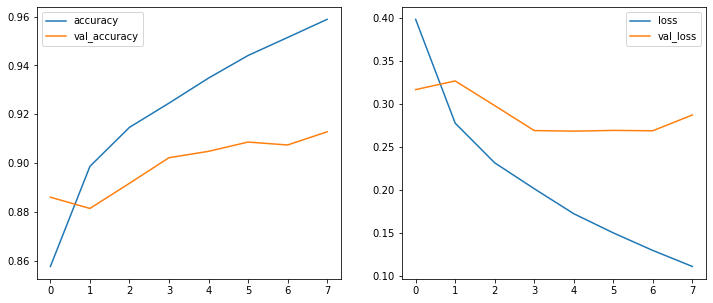

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

model_perf[['accuracy','val_accuracy']].plot(ax=axes[0])
model_perf[['loss','val_loss']].plot(ax=axes[1])

In [13]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [14]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.83      0.85      1000
           3       0.88      0.95      0.91      1000
           4       0.84      0.86      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.74      0.76      1000
           7       0.97      0.96      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



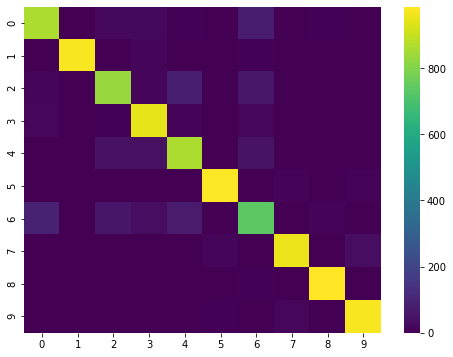

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(y_test,predictions), cmap='viridis')

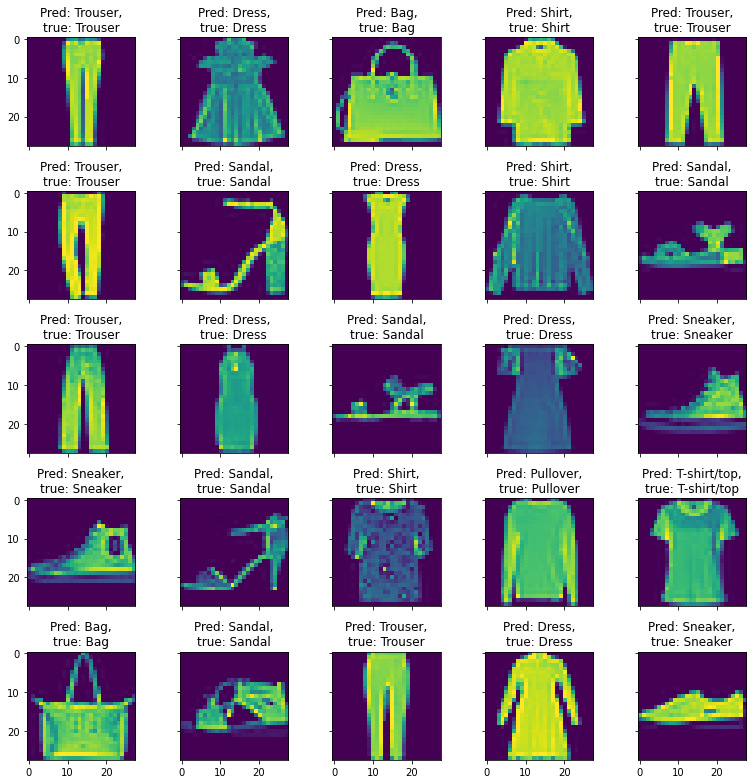

In [16]:
fig, axes = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(11,11))

for _, ax in enumerate(axes.flatten()):
    i = np.random.randint(0, len(x_test))
    pred_num = np.argmax(model.predict(x_test[i].reshape(1, 28, 28, 1)), axis=-1)
#     pred_num = model.predict_classes()
    ax.imshow(x_test[i].reshape(28, 28))
    ax.set_title(f'Pred: {d[pred_num[0]]},\ntrue: {d[y_test[i]]}')
plt.tight_layout()   
plt.show()